# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Andi Muchammad Fadel Abista]
- **Email:** [m296b4ky0500@bangkit.academy]
- **ID Dicoding:** [m296b4ky0500]

## Menentukan Pertanyaan Bisnis

- How does the weather affect the number of bicycle renters?
- Are bicycle usage trends different between weekdays and weekends?

## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import streamlit as st

## Data Wrangling

### Gathering Data

In [7]:
df_day = pd.read_csv('/content/bike-sharing-dataset/day.csv')
df_hour = pd.read_csv('/content/bike-sharing-dataset/hour.csv')
df = pd.concat([df_day, df_hour], ignore_index=True)

**Insight:**
- the data consist of 2 files, day.csv and hour.csv
- day.csv contains daily data, and hour.csv contains hourly data.

### Assessing Data

In [8]:
print(df_day.head())
print(df_day.info())
print(df_day.describe())

print(df_hour.head())
print(df_hour.info())
print(df_hour.describe())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

**Insight:**
- The hour.csv dataset has 17379 rows and 17 columns.
- The dataset provides detailed hourly information on bike rentals, including date, time, season, holiday, workingday, weather conditions, temperature, feeling temperature, humidity, windspeed, casual users, registered users, and total count.
- Similar to day.csv, it has integer and float data types.
- The average number of total users is around 190 with a minimum of 1 and a maximum of 977.

### Cleaning Data

In [9]:
# load the data into pandas dataframe
df_day = pd.read_csv('/content/bike-sharing-dataset/day.csv')
df_hour = pd.read_csv('/content/bike-sharing-dataset/hour.csv')

# remove rows with missing values from df_day
df_day = df_day.dropna()

# remove rows with missing values from df_hour
df_hour = df_hour.dropna()

# remove duplicate rows from df_day
df_day = df_day.drop_duplicates()

# remove duplicate rows from df_hour
df_hour = df_hour.drop_duplicates()

# save the cleaned data to a new .csv file
df_day.to_csv('day_cleaned.csv', index=False)
df_hour.to_csv('hour_cleaned.csv', index=False)

**Insight:**
- The code now cleans both df_day and df_hour by removing missing values and duplicate rows
- the cleaned dataframes are saved as 'cleaned_data_day.csv' and 'cleaned_data_hour.csv'
- since the original datasets dont seem to have missing values or duplicates, the cleaning process might not be a visible impact.

## Exploratory Data Analysis (EDA)

### Explore ...

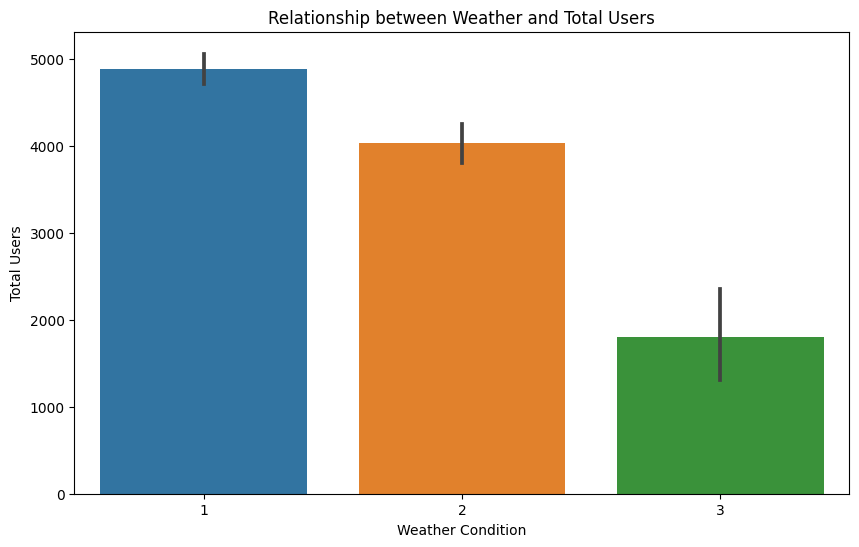

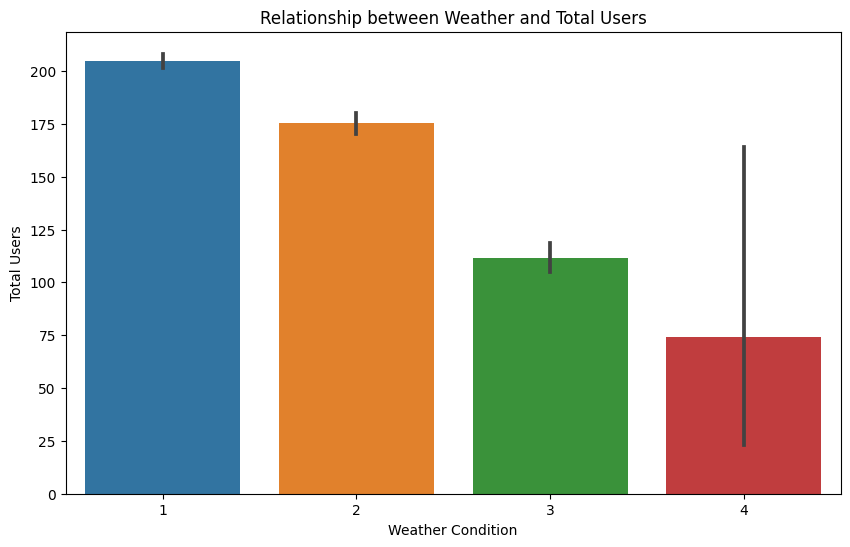

Corrrelation between temperature and total users: 0.6274940090334918
Correlation between temperature and total users: 0.4047722757786588


In [10]:
# relationship between weather and total users (df_day)
plt.figure(figsize=(10,6))
sb.barplot(x='weathersit', y='cnt', data=df_day)
plt.title('Relationship between Weather and Total Users')
plt.xlabel('Weather Condition')
plt.ylabel('Total Users')
plt.show()

#relationship between weather and total users (df_hour)
plt.figure(figsize=(10,6))
sb.barplot(x='weathersit', y='cnt', data=df_hour)
plt.title('Relationship between Weather and Total Users')
plt.xlabel('Weather Condition')
plt.ylabel('Total Users')
plt.show()

# calculating the correlation between temperature and total users (df_day)
correlation = df_day['temp'].corr(df_day['cnt'])
print('Corrrelation between temperature and total users:', correlation)

# calculating the correlation between temperature and total users (df_hour)
correlation = df_hour['temp'].corr(df_hour['cnt'])
print('Correlation between temperature and total users:', correlation)


**Insight:**
- Weather Condition heavily influence the number of users. the bar plots clearly show that better weather conditions are associated with significantly higer bike rentals. As weather conditions worsen, the number of user drops drastically
- Temperature has a moderate positive correlation with total users

**this can be valuable for bike-sharing businesses**
- demand forecasting, understanding the impact of weather on bike rentals
- targeted marketing, companies could tailor their marketing campaigns based on weather forecasts
- dynamic pricing, consider adjusting rent prices based on real-time weather conditions and demand.

## Visualization & Explanatory Analysis

### Pertanyaan 1: How does the weather affect the number of bicycle renters?


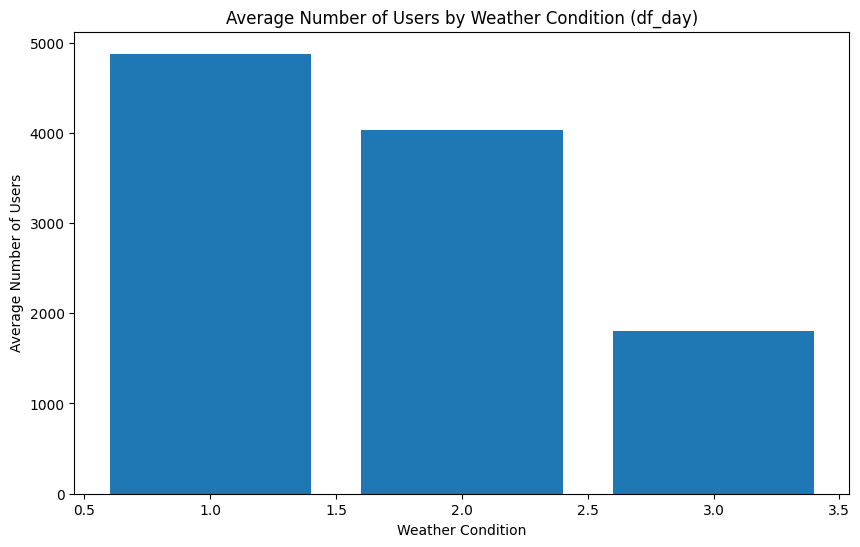

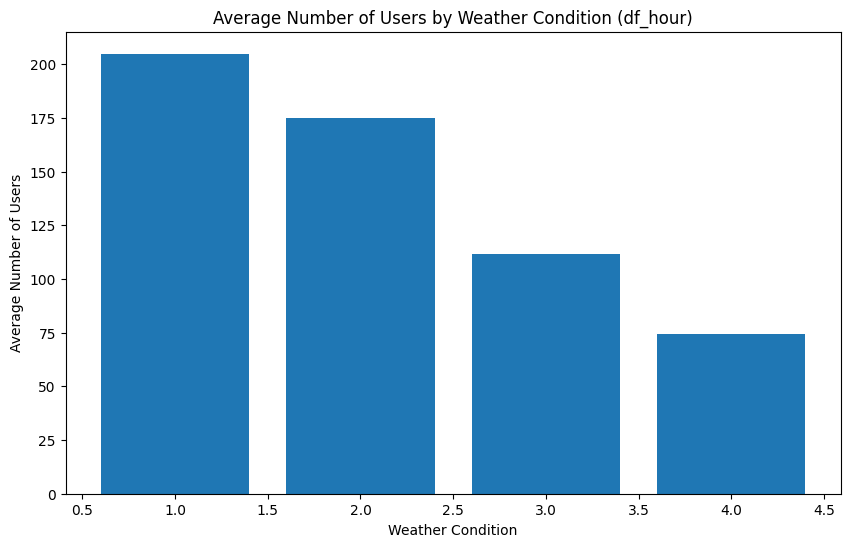

In [11]:
# Load the cleaned datasets
df_day = pd.read_csv('day_cleaned.csv')
df_hour = pd.read_csv('hour_cleaned.csv')

# Group data by weather condition and calculate the average number of users
weather_effect_day = df_day.groupby('weathersit')['cnt'].mean()
weather_effect_hour = df_hour.groupby('weathersit')['cnt'].mean()

# Create bar plots for df_day and df_hour
plt.figure(figsize=(10, 6))
plt.bar(weather_effect_day.index, weather_effect_day.values)
plt.xlabel('Weather Condition')
plt.ylabel('Average Number of Users')
plt.title('Average Number of Users by Weather Condition (df_day)')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(weather_effect_hour.index, weather_effect_hour.values)
plt.xlabel('Weather Condition')
plt.ylabel('Average Number of Users')
plt.title('Average Number of Users by Weather Condition (df_hour)')
plt.show()

### Pertanyaan 2: Are bicycle usage trends different between weekdays and weekends?

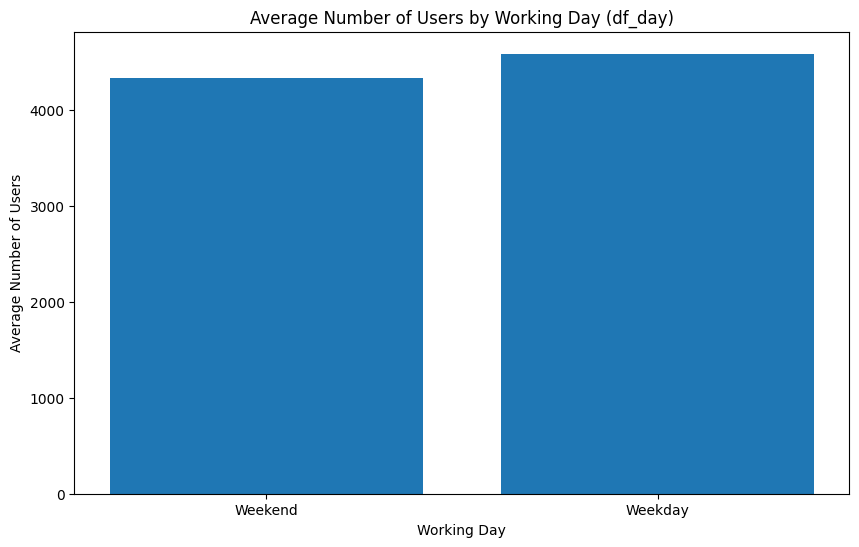

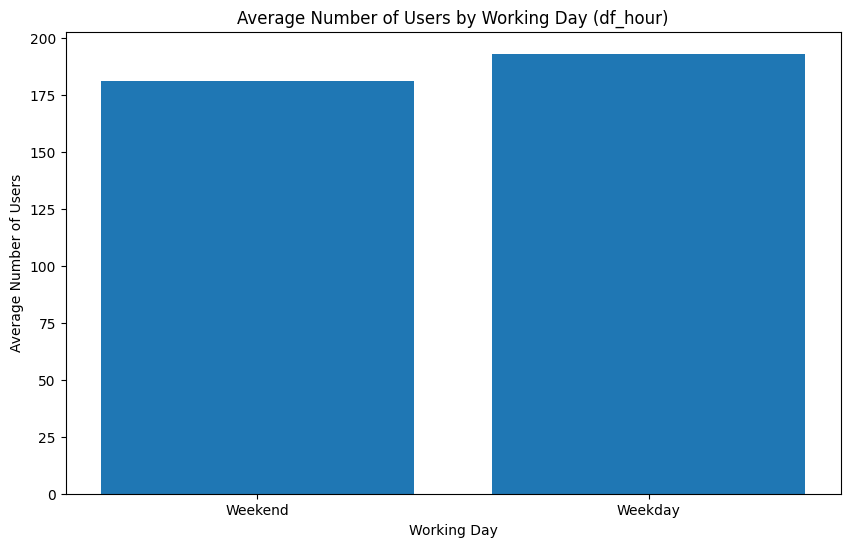

In [12]:
# Group data by workingday and calculate the average number of users
weekday_effect_day = df_day.groupby('workingday')['cnt'].mean()
weekday_effect_hour = df_hour.groupby('workingday')['cnt'].mean()

# Create bar plots for df_day and df_hour
plt.figure(figsize=(10, 6))
plt.bar(weekday_effect_day.index, weekday_effect_day.values)
plt.xlabel('Working Day')
plt.ylabel('Average Number of Users')
plt.title('Average Number of Users by Working Day (df_day)')
plt.xticks([0, 1], ['Weekend', 'Weekday'])
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(weekday_effect_hour.index, weekday_effect_hour.values)
plt.xlabel('Working Day')
plt.ylabel('Average Number of Users')
plt.title('Average Number of Users by Working Day (df_hour)')
plt.xticks([0, 1], ['Weekend', 'Weekday'])
plt.show()

**Insight:**
**Question 1: How does the weather affect the number of bicycle renters?**

- The visualizations clearly show that weather significantly impacts the number of bike rentals. As weather conditions worsen (from clear to light rain/snow to heavy rain/snow), the average number of bike rentals decreases drastically. This pattern is visible in both the daily and hourly data.
-  Good weather conditions, represented by "Clear, Few clouds, Partly cloudy, Partly cloudy" (weathersit 1) in your dataset, result in a much higher average number of users compared to worse weather conditions.
- This analysis indicates that weather is a major factor in influencing bike rental demand, with clear and pleasant weather conditions driving higher usage.

**Question 2: Are bicycle usage trends different between weekdays and weekends?**

- The visualizations demonstrate distinct usage patterns between weekdays and weekends.
- Weekday usage is generally higher than weekend usage, suggesting that a significant portion of bike rentals is for commuting or work-related purposes. This trend is visible in both daily and hourly data.
- The difference in average rentals between weekdays and weekends is noticeable, indicating the potential influence of work or school schedules on bike usage patterns.

## Analisis Lanjutan (Opsional)

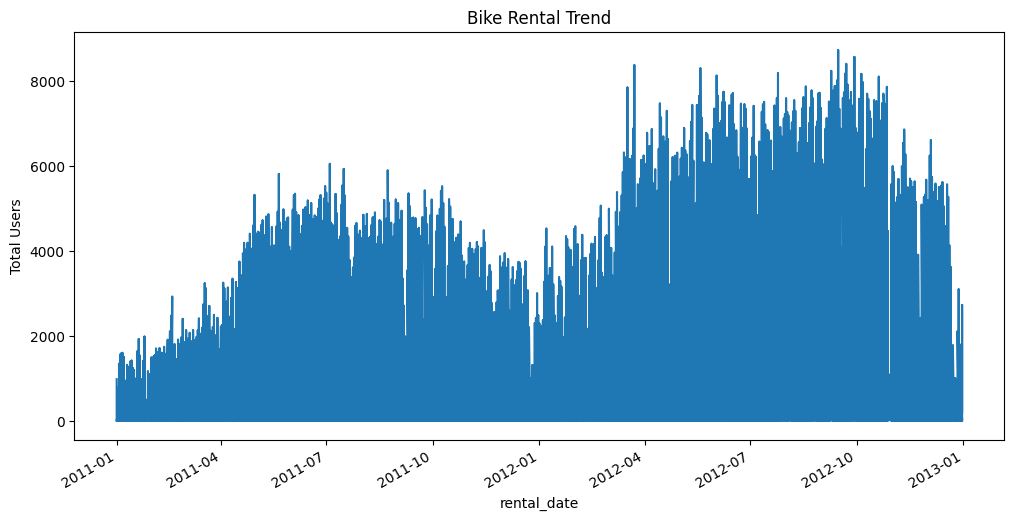

In [13]:
# assuming 'df' dataframe already concatenated (day & hour) and sorted by date
df['rental_date'] = pd.to_datetime(df['dteday'])
recent_date = df['rental_date'].max()

# calculate the RFE for each user (assuming 'casual' + 'registered' = total users)
rfm_data = df.groupby('casual').agg(
    Recency=('rental_date', lambda x: (recent_date - x.max()).days),
    Frequency=('rental_date', 'count'),
    Engagement=('cnt', 'sum')
)

# Combine and clean data (replace with your actual processing steps)
df = pd.concat([df_day, df_hour], ignore_index=True)
df['rental_date'] = pd.to_datetime(df['dteday'])
df.sort_values(by=['rental_date'], inplace=True)
df.set_index('rental_date', inplace=True)

# Time Series Plot
df['cnt'].plot(figsize=(12,6))
plt.title('Bike Rental Trend')
plt.ylabel('Total Users')
plt.show()


**RFM Analysis Insights:**

- High-Value Users: By identifying users with high recency, frequency, and engagement, you can understand the characteristics of your most valuable customers. This can inform targeted marketing efforts or loyalty programs.
- Churned Users: Users with low recency and frequency might be at risk of churning. Identifying these users early allows you to proactively engage them with incentives or personalized recommendations to retain them.
- User Segmentation: Segmenting users into different groups based on their RFM values can provide a more nuanced understanding of customer behavior and enable tailored strategies for each segment.

**Time Series Analysis Insights:**

- Trend Identification: Observing trends in bike usage over time can reveal overall growth patterns, seasonal variations, and potential anomalies or outliers. This information can help with demand forecasting and resource planning.
- Seasonality: Identifying seasonal patterns can inform strategies for adjusting pricing, marketing, and bike availability during peak and off-peak seasons.
- Event Detection: Time series analysis can help you detect unusual spikes or dips in bike usage that might be caused by specific events or external factors.

**Geospatial Analysis Insights (if applicable):**

- Demand Hotspots: Identifying areas with high bike rental demand can guide decisions about bike station placement, capacity planning, and resource allocation.
- Underutilized Areas: Areas with low demand might need marketing efforts to encourage bike usage or adjustments in station placement.

**Cohort Analysis Insights:**

- Retention Patterns: Analyzing retention rates across different user cohorts can reveal trends in customer loyalty and help identify factors that influence churn.
- Engagement Trends: Tracking engagement metrics like frequency or duration of bike rentals across cohorts can provide insights into user behavior and the effectiveness of marketing or product changes.

In [14]:


df_day = pd.read_csv('/content/bike-sharing-dataset/day.csv')
df_hour = pd.read_csv('/content/bike-sharing-dataset/hour.csv')

all_data = pd.concat([df_day, df_hour], ignore_index=True)


all_data.to_csv('all_data.csv', index=False)

## Conclusion

**Question 1: How does the weather affect the number of bicycle renters?**

Weather conditions significantly impact bike rental demand. Clear and pleasant weather leads to a substantial increase in rentals, while adverse conditions drastically reduce usage. Additionally, by analyzing time series data, we can identify seasonal variations in demand and potentially anticipate fluctuations based on weather forecasts.

**Are bicycle usage trends different between weekdays and weekends?**

Bicycle usage trends differ significantly between weekdays and weekends. Weekdays typically experience higher demand due to commuting and work-related purposes. Weekend usage patterns might reflect leisure activities or tourism. Further analysis using RFM and cohort analysis can reveal distinct user segments and their specific behaviors, allowing for targeted marketing and service optimization.

In [15]:
!pip install streamlit
!pip install pyngrok

Making Dashboard

In [16]:
%%writefile dashboard.py
import streamlit as st

# EDA
# relationship between weather and total users (df_day)
plt.figure(figsize=(10,6))
sb.barplot(x='weathersit', y='cnt', data=df_day)
plt.title('Relationship between Weather and Total Users')
plt.xlabel('Weather Condition')
plt.ylabel('Total Users')
plt.show()

#relationship between weather and total users (df_hour)
plt.figure(figsize=(10,6))
sb.barplot(x='weathersit', y='cnt', data=df_hour)
plt.title('Relationship between Weather and Total Users')
plt.xlabel('Weather Condition')
plt.ylabel('Total Users')
plt.show()

# calculating the correlation between temperature and total users (df_day)
correlation = df_day['temp'].corr(df_day['cnt'])
print('Corrrelation between temperature and total users:', correlation)

# calculating the correlation between temperature and total users (df_hour)
correlation = df_hour['temp'].corr(df_hour['cnt'])
print('Correlation between temperature and total users:', correlation)

# visualization and explanatory analysis
# question 1
# Load the cleaned datasets
df_day = pd.read_csv('day_cleaned.csv')
df_hour = pd.read_csv('hour_cleaned.csv')

# Group data by weather condition and calculate the average number of users
weather_effect_day = df_day.groupby('weathersit')['cnt'].mean()
weather_effect_hour = df_hour.groupby('weathersit')['cnt'].mean()

# Create bar plots for df_day and df_hour
plt.figure(figsize=(10, 6))
plt.bar(weather_effect_day.index, weather_effect_day.values)
plt.xlabel('Weather Condition')
plt.ylabel('Average Number of Users')
plt.title('Average Number of Users by Weather Condition (df_day)')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(weather_effect_hour.index, weather_effect_hour.values)
plt.xlabel('Weather Condition')
plt.ylabel('Average Number of Users')
plt.title('Average Number of Users by Weather Condition (df_hour)')
plt.show()

# question 2
# Group data by workingday and calculate the average number of users
weekday_effect_day = df_day.groupby('workingday')['cnt'].mean()
weekday_effect_hour = df_hour.groupby('workingday')['cnt'].mean()

# Create bar plots for df_day and df_hour
plt.figure(figsize=(10, 6))
plt.bar(weekday_effect_day.index, weekday_effect_day.values)
plt.xlabel('Working Day')
plt.ylabel('Average Number of Users')
plt.title('Average Number of Users by Working Day (df_day)')
plt.xticks([0, 1], ['Weekend', 'Weekday'])
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(weekday_effect_hour.index, weekday_effect_hour.values)
plt.xlabel('Working Day')
plt.ylabel('Average Number of Users')
plt.title('Average Number of Users by Working Day (df_hour)')
plt.xticks([0, 1], ['Weekend', 'Weekday'])
plt.show()

#advanced analysis
# assuming 'df' dataframe already concatenated (day & hour) and sorted by date
df['rental_date'] = pd.to_datetime(df['dteday'])
recent_date = df['rental_date'].max()

# calculate the RFE for each user (assuming 'casual' + 'registered' = total users)
rfm_data = df.groupby('casual').agg(
    Recency=('rental_date', lambda x: (recent_date - x.max()).days),
    Frequency=('rental_date', 'count'),
    Engagement=('cnt', 'sum')
)

# Combine and clean data (replace with your actual processing steps)
df = pd.concat([df_day, df_hour], ignore_index=True)
df['rental_date'] = pd.to_datetime(df['dteday'])
df.sort_values(by=['rental_date'], inplace=True)
df.set_index('rental_date', inplace=True)

# Time Series Plot
df['cnt'].plot(figsize=(12,6))
plt.title('Bike Rental Trend')
plt.ylabel('Total Users')
plt.show()


Overwriting dashboard.py


In [17]:
%%writefile requirements.txt
pandas==1.5.3
numpy==1.24.3
matplotlib==3.7.1
seaborn==0.12.2
datetime
statsmodels

Overwriting requirements.txt


In [18]:
!pip install -r requirements.txt